<a href="https://colab.research.google.com/github/yasararafath-s/Image_classification_cnn/blob/main/Image_classification_CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Convolutional Neural Networks for MNIST (handwritten dataset)-using pythorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# Load MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# visualize the data
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
images, labels = next(dataiter)

print(images[0].shape)
print(labels[0])

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([1, 28, 28])
tensor(1)


In [6]:
# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)

In [7]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Train the model
epochs = 15
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Record training loss
    train_losses.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Validation Loss: {val_loss / len(test_loader):.4f}')

Epoch [1/15], Train Loss: 0.2662, Validation Loss: 0.0480
Epoch [2/15], Train Loss: 0.0972, Validation Loss: 0.0381
Epoch [3/15], Train Loss: 0.0736, Validation Loss: 0.0308
Epoch [4/15], Train Loss: 0.0585, Validation Loss: 0.0273
Epoch [5/15], Train Loss: 0.0518, Validation Loss: 0.0254
Epoch [6/15], Train Loss: 0.0461, Validation Loss: 0.0241
Epoch [7/15], Train Loss: 0.0396, Validation Loss: 0.0294
Epoch [8/15], Train Loss: 0.0361, Validation Loss: 0.0238
Epoch [9/15], Train Loss: 0.0336, Validation Loss: 0.0208
Epoch [10/15], Train Loss: 0.0303, Validation Loss: 0.0211
Epoch [11/15], Train Loss: 0.0268, Validation Loss: 0.0251
Epoch [12/15], Train Loss: 0.0251, Validation Loss: 0.0272
Epoch [13/15], Train Loss: 0.0227, Validation Loss: 0.0212
Epoch [14/15], Train Loss: 0.0244, Validation Loss: 0.0271
Epoch [15/15], Train Loss: 0.0223, Validation Loss: 0.0250


In [9]:
# Evaluate the model
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())

In [10]:
# Compute Metrics
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
print("Classification Report:\n", classification_report(all_labels, all_preds, digits=4))
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0     0.9959    0.9959    0.9959       980
           1     0.9965    1.0000    0.9982      1135
           2     0.9885    0.9971    0.9928      1032
           3     0.9941    0.9960    0.9951      1010
           4     0.9929    0.9969    0.9949       982
           5     0.9944    0.9922    0.9933       892
           6     0.9969    0.9948    0.9958       958
           7     0.9961    0.9903    0.9932      1028
           8     0.9949    0.9949    0.9949       974
           9     0.9950    0.9861    0.9905      1009

    accuracy                         0.9945     10000
   macro avg     0.9945    0.9944    0.9945     10000
weighted avg     0.9945    0.9945    0.9945     10000

Precision: 0.9945
Recall: 0.9945
F1 Score: 0.9945


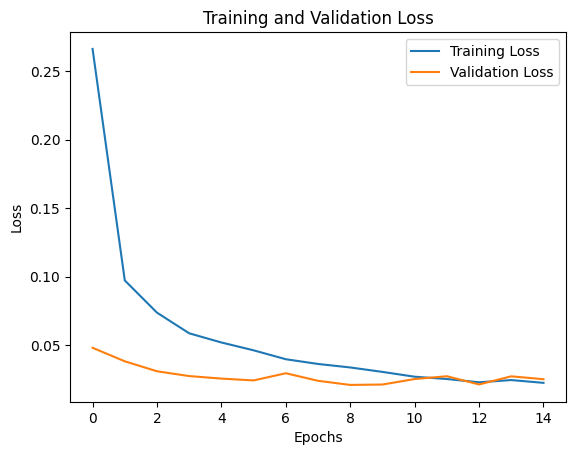

In [11]:
# Plot Training and Validation Loss
plt.figure()
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

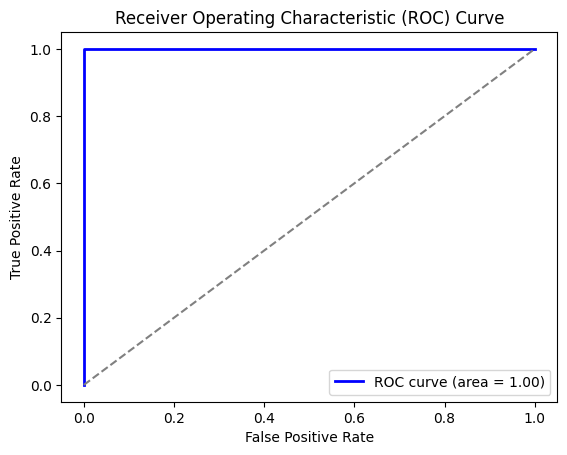

In [15]:
# ROC Curve (for binary classification approximation)s
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc

y_true_bin = np.array(all_labels)
y_score_bin = np.array(all_probs)[:, 1]  # Use probabilities of one class for ROC
fpr, tpr, _ = roc_curve(y_true_bin == 1, y_score_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

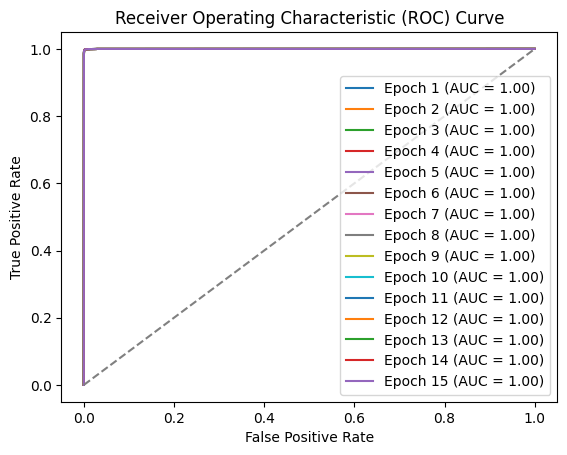

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Evaluate the model and store predictions for each epoch
all_probs_epochs = []  # List to store probabilities for each epoch
all_labels_epochs = [] # List to store true labels for each epoch

for epoch in range(epochs):
    model.eval()  # Set the model to evaluation mode
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            all_probs.extend(probabilities.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_probs_epochs.append(all_probs)  # Store probabilities for this epoch
    all_labels_epochs.append(all_labels) # Store labels for this epoch

# Plot ROC curves for all epochs
plt.figure()

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(all_labels_epochs[0], classes=range(10)) # Assuming 10 classes for MNIST
n_classes = y_true_bin.shape[1]

# Calculate and plot ROC curve for each epoch
for epoch in range(epochs):
    y_score_bin = np.array(all_probs_epochs[epoch])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve for the current epoch
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Epoch {epoch+1} (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Save the model
torch.save(model.state_dict(), 'cnn_mnist_pytorch.pth')
print("Model saved successfully!")

Model saved successfully!
